In [12]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from tqdm import tqdm, tqdm_notebook
import xgboost
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_table('/home/dania_57_v/data/train.csv')
test = pd.read_csv('test.csv')

In [4]:
data = data.dropna()
data.drop(labels=['pdb_chain', 'DSSR'], axis=1, inplace=True)
test.drop(labels=['pdb_chain', 'DSSR', 'index', 'Id'], axis=1, inplace=True)

In [26]:
alpha = 0.3

def pred_to_class(predicted, alpha):
    to_class = [1 if predicted[i][1] > alpha else 0 for i in range(len(predicted))]
    return to_class

In [6]:
my_strf = StratifiedKFold(n_splits=5)
my_strf.get_n_splits(data.iloc[:, :-1], data.iloc[:, -1])

5

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [35]:
opt_depth = 3
opt_est = 100
opt_pred = 0

0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.23895370877385114
0.24727855568664986
0.2504636095148698
0.25500248056887714
0.25651975720352205
0.25981858177414174
0.2655946051095837
0.2709592036365729
0.278510398194422
0.2802510368113921
0.27830968585380855
0.27953110910730383
0.2785944159345916
0.2831150273874732
0.2792429413589823
0.281947261663286
0.27907249779864984
0.2815599778202205
0.28081405881997706
0.282719836400818
0.2768904499966863
0.2805890227576975
0.28403080013391363
0.28479657387580304
0.28538487622923026
0.28274428274428276
0.2810699588477366
0.27904142973192525
0.2800435019032082
0.2782428225527499
0.27920305676855894
0.2835546475995914
0.28853624810693357
0.2898134863701578
0.2876401494927923
0.23895370877385114
0.23895370877385114
0.

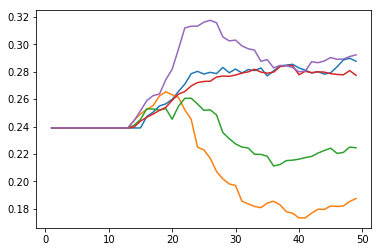

In [27]:
for train_ind, test_ind in my_strf.split(X, y):
    mass = []
    xgb = xgboost.XGBClassifier(n_estimators=50, n_jobs=-1).fit(X.iloc[train_ind], y.iloc[train_ind])
    for i in range(1, 50):
        new_f1 = f1_score(pred_to_class(xgb.predict_proba(X.iloc[test_ind], ntree_limit=i), 0.171), y.iloc[test_ind])
        print(new_f1)
        mass.append(new_f1)
    plt.plot(np.arange(1, 50), mass)
    plt.plot()

0.24765005513837104
0.27075946374902915
0.278510398194422
0.28529760895370526
0.28957127057445836
0.2921573875802998
0.2919526704582598
0.29450972308115164
0.2958085864585101
0.19959584825939192
0.2358816126020056
0.24526243484585236
0.248430709802028
0.25858214912981
0.26046066788873834
0.24787943047561345
0.2641291810841984
0.2643551929714465
0.2166871309127054
0.2596869386707724
0.2606275953593904
0.2609676719461922
0.27337828217262033
0.2686553713049748
0.27449728694541975
0.2732481269281622
0.2689110774217157
0.2646188424798651
0.2678187054721843
0.26958714342133244
0.26742583158525624
0.27277696793002915
0.27205094256352064
0.27111422030017807
0.2774357817384858
0.28188008636439127
0.2807139692385594
0.31144236628697325
0.31317801885114704
0.3205212956842005
0.32532761274075456
0.3358427235674898
0.33287342224947625
0.3333685545224007
0.3240684178375076


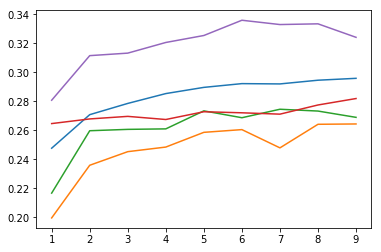

In [33]:
for train_ind, test_ind in my_strf.split(X, y):
    mass = []
    for depth in range(1, 10):
        xgb = xgboost.XGBClassifier(n_estimators=23, n_jobs=-1, max_depth=depth).fit(X.iloc[train_ind], y.iloc[train_ind])
        new_f1 = f1_score(pred_to_class(xgb.predict_proba(X.iloc[test_ind]), 0.171), y.iloc[test_ind])
        print(new_f1)
        mass.append(new_f1)
    plt.plot(np.arange(1, 10), mass)
    plt.plot()

In [34]:
xgb = xgboost.XGBClassifier(max_depth=8, n_estimators=23)

In [43]:
samples = pd.read_csv('sample_submission.csv')
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=23,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
predicted = pred_to_class(xgb.predict_proba(test), 0.17)
samples['mg'] = predicted
samples.to_csv('new_ans.csv', index=False)